In [2]:
import numpy as np
data = np.load('C:\\Users\\zihan\\Desktop\\Files\\Research\\bryankelly_without_missing.npz')
processed_data = data['processed_data']
T, N, M = processed_data.shape
returns = processed_data[:, :, 1]
# The dimension of returns: T*N
chara_data = processed_data[:, :, [8, 17, 33, 37]]

In [3]:
def get_tree(depth, res, nodetag, value_array, L, d, chara_data, oldlist):
    if depth == d:
        final_array = np.ones([N, 1])
        for k in range(L):
            temp = value_array[:, k].reshape([N, 1])
            final_array = final_array * temp
        res.append([final_array])
        nodetag.append(oldlist)
    else:
        for i in range(L):
            for j in range(2):
                index = value_array[:, i] != 0
                data_median = np.median(chara_data[i, index])
                temp_array = value_array.copy()
                newlist= list(oldlist)
                newlist+=[(i,j)]
                if j == 0:
                    temp_array[(index) & (chara_data[i, :] <= data_median), i] = 0
                    get_tree(depth + 1, res,nodetag, temp_array, L, d, chara_data, newlist)
                elif j == 1:
                    temp_array[(index) & (chara_data[i, :] >= data_median), i] = 0
                    get_tree(depth + 1, res, nodetag, temp_array, L, d, chara_data, newlist)
portfolio = np.zeros((T - 1, (2*4)**4))
for i in range(T-1):
    if i%20==0:
            print ('Have gone through %d' %(i))
    res = []
    nodetag= []
# The first parameter is number of characteristics, and the second is the depth of the tree.
    get_tree(0, res, nodetag, np.ones([N, 4]), 4, 4, chara_data[i,:].T, [])
    # output = np.array(res[0][0])
    # output = np.reshape(output, [N, 1])
    # for j in range(1, len(res)):
    #     output = np.append(output, np.array(res[j][0]), axis=1)
    # portfolio[i, :] = returns[i + 1, :].dot(output)
    for j in range(len(res)):
        portfolio[i][j]= returns[i+1,:].dot(res[j])

Have gone through 0


Have gone through 20


Have gone through 40


Have gone through 60


Have gone through 80


Have gone through 100


Have gone through 120


Have gone through 140


Have gone through 160


Have gone through 180


Have gone through 200


Have gone through 220


Have gone through 240


Have gone through 260


Have gone through 280


Have gone through 300


Have gone through 320


Have gone through 340


.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.459e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:339: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 5 iterations, alpha=8.637e-03, previous alpha=7.294e-03, with an active set of 6 regressors.
  ConvergenceWarning)


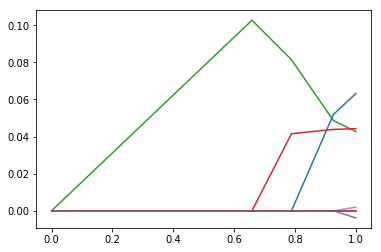

In [38]:
Sigma= np.cov(portfolio.T)
mu= np.mean(portfolio, axis= 0)
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
alphas, _, coefs= linear_model.lars_path(Sigma, mu, method= 'lasso', alpha_min= 10**(-4),verbose=True)
xx= np.sum(np.abs(coefs.T), axis= 1)
xx/= xx[-1]
plt.plot(xx, coefs.T)
plt.show()
plt.savefig('C:\\Users\\zihan\\Desktop\\Files\\Research\\books.png')

In [31]:
print (clf.coef_[1:100])
print (clf.intercept_)

[ 0.         -0.          0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.         -0.
  0.         -0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.06900036
  0.         -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.          0.         -0.          0.         -0.
  0.          0.          0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0